# Applied Machine Learning 

## Homework 7: Clustering and recommender systems



In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

## Exercise 1: Document clustering toy example <a name="1"></a>
<hr>

In lecture 14, we looked at a popular application of clustering: customer segmentation. In this homework, we will work on a toy example of another popular application: [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A), and clustering is a commonly used technique to organize this data in a meaningful way. 

In this exercise, we will create a toy dataset with sentences from Wikipedia articles and cluster these sentences. 

### 1.1 Sample sentences from Wikipedia articles
rubric={points:2}

The code below extracts first sentences of Wikipedia articles on a set of queries. You will need the `wikipedia` package installed in the course environment to run the code below. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```

You also need `nltk` library in the course environment. 

```
conda install -c anaconda nltk 
```        

**Your tasks:**

Run the code below and answer the following question. 

1. Given this dataset, how many clusters would you expect a clustering algorithm to identify? How would you manually label these clusters?   

> *Note 2: Feel free to experiment with queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs when they grade your submission.*


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import wikipedia

queries = [
    "mango_fruit",
    "pastry",
    "Julia language",
    "Python language",
    "hockey",
    "football",
    "supervised learning",
    "unsupervised learning"    
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    sent = sent_tokenize(wikipedia.page(queries[i]).content)[0]
    wiki_dict["text"].append(sent)
    wiki_dict["n_words"].append(len(word_tokenize(sent)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,mango_fruit,A mango is an edible stone fruit produced by the tropical tree Mangifera indica.,15
1,pastry,"Pastry is baked food made with a dough of flour, water, and shortening (solid fats, including butter or lard) that may be savoury or sweetened.",31
2,Julia language,"Julia is a high-level, general-purpose dynamic programming language, most commonly used for numerical analysis and computational science.",20
3,Python language,"Python is a high-level, general-purpose programming language.",9
4,hockey,"Hockey is a term used to denote a family of various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.",40
5,football,"Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.",22
6,supervised learning,"Supervised learning (SL) is a paradigm in machine learning where input objects (for example, a vector of predictor variables) and a desired output value (also known as human-labeled supervisory signal) train a model.",41
7,unsupervised learning,"Supervised learning (SL) is a paradigm in machine learning where input objects (for example, a vector of predictor variables) and a desired output value (also known as human-labeled supervisory signal) train a model.",41


### 1.Given this dataset, how many clusters would you expect a clustering algorithm to identify? How would you manually label these clusters?

#### Ans :- From above dataset i can consider that there are mainly three categories(clusters) which i found so there are 3 clusters

<br><br>

### 1.2 `KMeans` with bag-of-words representation 
rubric={points:4}

We have seen that before we pass text to machine learning models, we need to encode it into a numeric representation. So let's encode our toy dataset above (`wiki_df`) to a numeric representation. 

First, let's try our good old friend: bag-of-words representation. The code below creates dense bag-of-words representation of Wikipedia sentences from 1.1 with [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 

**Your tasks:**

Run the code below and answer the following questions. 

1. Run `KMeans` clustering on the transformed data (`bow_sents`) with K = the number of clusters you identified in 1.1.  
2. Examine clustering labels assigned by `KMeans`. Is `KMeans` doing a reasonable job in clustering the sentences? 

> You can access cluster label assignments using `labels_` attribute of the clustering object. 

In [5]:
vec = CountVectorizer(stop_words='english')
bow_sents = vec.fit_transform(wiki_df["text"]).todense()
bow_df = pd.DataFrame(
    data=bow_sents, columns=vec.get_feature_names(), index=wiki_df.index
)
bow_df

,analysis,baked,ball,butter,commonly,computational,degrees,denote,desired,dough,...,tropical,types,used,value,variables,various,varying,vector,water,winter
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


1.Run KMeans clustering on the transformed data (bow_sents) with K = the number of clusters you identified in 1.1.

In [6]:
model_kmeans1 = KMeans(n_clusters=3,random_state=10)
model_kmeans1.fit(bow_df)
model_kmeans1.labels_

array([1, 1, 1, 1, 2, 1, 0, 0])

2.Examine clustering labels assigned by KMeans. Is KMeans doing a reasonable job in clustering the sentences?

Ans :- No, clustering labels assigned by Kmeans is not doing reasinable job.

<br><br>

### 1.3 Sentence embedding representation
rubric={points:6}

Clustering is sensitive to what kind of representation we use for the given data. 
Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer representations of text, and we are going to use one such representation in this exercise. 

The code below creates an alternative and a more expressive representation of sentences. We will call it *sentence embedding representation*. We'll use [sentence transformer](https://www.sbert.net/index.html) to extract these representations. At this point it's enough to know that this is an alternative representation of text which usually works better than simple bag-of-words representation. We will talk a bit more about embedding representations next week. You need to install `sentence-transformers` in the course conda environment to run the code below. 

```
conda activate cpsc330
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

Run the code below and answer the following questions. 

1. How many dimensions (features associated with each example) are present in this representation? 
2. Run `KMeans` clustering with sentence embedding representation of text (`emb_sents`) and examine cluster labels. 
3. How well the sentences are clustered together? 

In [115]:
# pip install sentence_transformers

In [7]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [66]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.141320,0.030474,0.261100,-0.219024,-0.277812,0.177240,0.191265,0.252725,-0.035201,0.198338,...,0.104466,-0.177960,0.088618,0.289035,-0.089657,0.246049,-0.060229,0.500508,-0.045897,-0.046336
1,-0.040458,0.104715,-0.008742,0.351525,0.490575,-0.022275,-0.134592,0.143244,-0.201387,0.262996,...,0.107729,0.057392,0.224718,0.171594,0.083601,0.356225,-0.025583,0.264476,0.064272,-0.113480


    1.How many dimensions (features associated with each example) are present in this representation? 
    Ans :- There are 768 dimentionas

2.Run KMeans clustering with sentence embedding representation of text (emb_sents) and examine cluster labels.

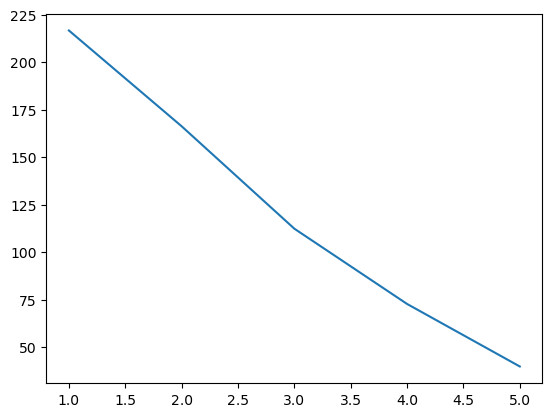

In [9]:
# Using Elbow method to find best no of clusters
inertia1=[]
for i in range(1,6):
    model_ = KMeans(n_clusters=i)
    model_.fit(emb_sent_df)
    inertia1.append(model_.inertia_)
plt.plot(range(1,6),inertia1)

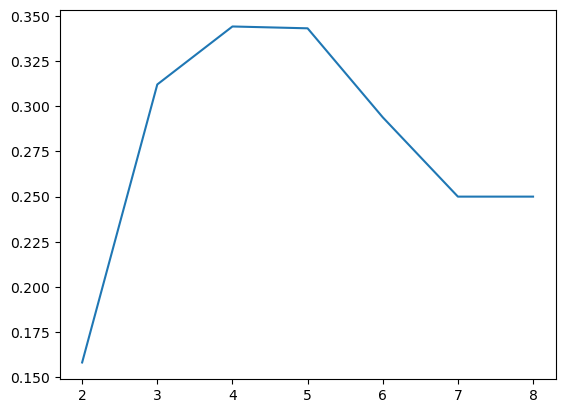

In [10]:
# Using Silhouette method to find best no of clusters
from sklearn.metrics import silhouette_score
silhoet_score = []
for k in range(2,9):
    sil = KMeans(n_clusters=k)
    sil.fit(emb_sent_df)
    score = silhouette_score(emb_sent_df,sil.labels_)
    silhoet_score.append(score)
plt.plot(range(2,9),silhoet_score)

In [11]:
model_kmeans2 = KMeans(n_clusters=4,random_state=10)
model_kmeans2.fit(emb_sent_df)
model_kmeans2.labels_

array([0, 0, 1, 1, 3, 3, 2, 2])

    3. How well the sentences are clustered together?
    Ans :- The sentences are clustered well toggetgher

<br><br>

### 1.4 DBSCAN with cosine distance  
rubric={points:8}

Let's try `DBSCAN` on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text (sparse data), [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work better. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

In this exercise, you'll use DBSCAN with cosine distances. 

**Your tasks**

1. Use DBSCAN to cluster our toy data using sentence embedding representation (`emb_sents`) and `metric='cosine'`. 
2. Briefly comment on the number of clusters identified and the cluster assignment given by the algorithm.

> *Note: You will also have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values for these hyperparameters won't work on this toy dataset. In order to set appropriate value for `eps`, you may want to examine the distances given by [sklearn's `cosine_distance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html).*

In [12]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(emb_sent_df).mean()

0.66135937

In [13]:
model_dbscan = DBSCAN(min_samples=2,eps=0.6,metric='cosine')
model_dbscan.fit(emb_sent_df)
model_dbscan.labels_

array([-1, -1,  0,  0,  1,  1,  2,  2], dtype=int64)

<br><br>

### 1.5 Visualizing clusters 
rubric={points:5}

One thing we could do with unlabeled data is visualizing it. That said, our data is high dimensional (each example is represented with 768 dimensions) and high-dimensional data is hard to visualize. One way to visualize high-dimensional data is applying dimensionality reduction to get the most important (2 or 3) components of the dataset and visualizing this low-dimensional data. 

Given data as a `numpy` array and cluster assignments, the `plot_pca_clusters` function below transforms the given data by applying dimensionality reduction and plots the transformed data into corresponding clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the PCA part. Feel free to modify the function as you see fit.*

**Your tasks:**

1. Call the function `plot_pca_clusters` to visualize the clusters created by the three models above:
    - KMeans with bag-of-words representation 
    - KMeans with sentence embedding representation 
    - DBSCAN with sentence embedding representation 

In [25]:
from sklearn.decomposition import PCA # Obtain the principal components

def plot_pca_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization",
):
    """
    Carry out dimensionality reduction using PCA and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
    pca_df["cluster"] = cluster_labels

    plt.figure(figsize=(10, 7))
    plt.title(title)
    ax = sns.scatterplot(
        x="pca1", y="pca2", hue="cluster", data=pca_df, palette="tab10", s=size
    )

    x = pca_df["pca1"].tolist()
    y = pca_df["pca2"].tolist()
    if show_labels:
        for i, txt in enumerate(raw_sents):
            plt.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
#         ax.legend(loc="left")

        
    plt.show()

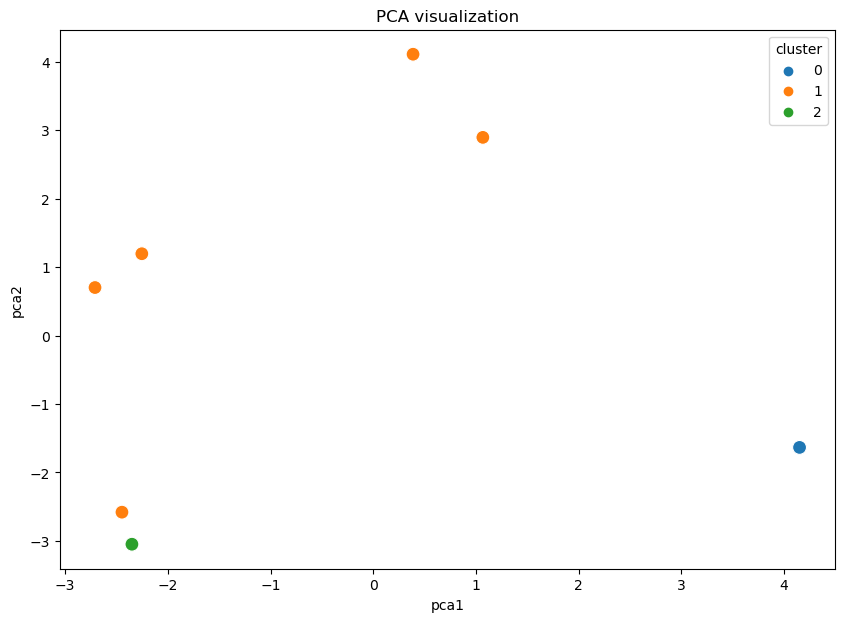

In [28]:
model1 = plot_pca_clusters(
    emb_sent_df,
    model_kmeans1.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization"
)

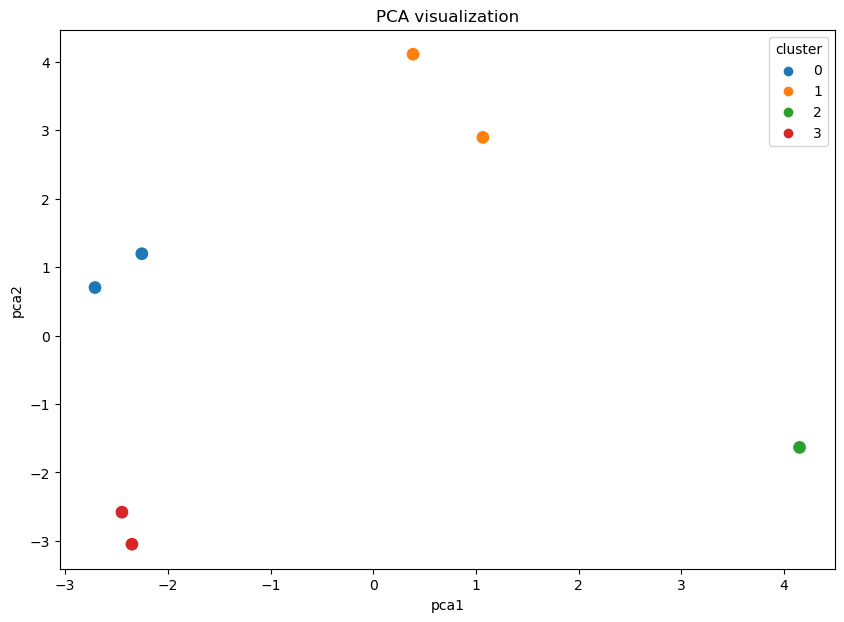

In [23]:
model2 = plot_pca_clusters(
    emb_sent_df,
    model_kmeans2.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization",
)

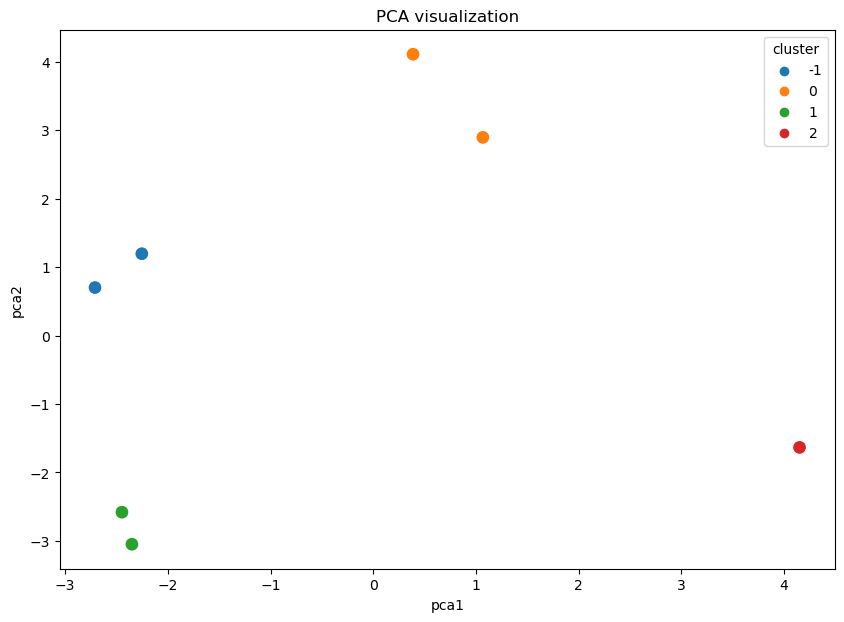

In [370]:
model3 = plot_pca_clusters(
    emb_sent_df,
    model_dbscan.labels_,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization",
)

<br><br><br><br>

## Exercise 2: Movie recommendations
<hr>

Let's build simple movie recommendation systems using the [MovieLens dataset](https://www.kaggle.com/prajitdatta/movielens-100k-dataset/data). The original source of the data is [here](https://grouplens.org/datasets/movielens/), and the structure of the data is described in the [README](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) that comes with it. The code below reads the data as a CSV assuming that it's under `data/ml-100k/` directory under your lab folder. 

In [2]:
import os
path = os.getcwd()
r_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv(
    os.path.join( "ml-100k", "u.data"),
    sep="\t",
    names=r_cols,
    encoding="latin-1",
)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# We'll be using these keys later in the starter code
user_key = "user_id"
item_key = "movie_id"

### 2.1 Terminology
rubric={points:3}

Here is some notation we will be using in this homework. 

**Constants**:

 - $N$: the number of users, indexed by $n$
 - $M$: the number of movies, indexed by $m$
 - $\mathcal{R}$: the set of indices $(n,m)$ where we have ratings in the utility matrix $Y$
    - Thus $|\mathcal{R}|$ is the total number of ratings
 
**The data**:

 - $Y$: the utility matrix containing ratings, with a lot of missing entries
 - `train_mat` and `valid_mat`: Utility matrices for train and validation sets, respectively
 
    
**Your tasks:**    

1. What are the values of $N$ and $M$ in movie ratings data?  
2. What would be the shape of the dense utility matrix $Y$? 
3. What would be the fraction of non missing ratings in the utility matrix $Y$? 

In [4]:
N = len(np.unique(ratings[user_key]))
M = len(np.unique(ratings[item_key]))

2. What would be the shape of the dense utility matrix  𝑌
 ?

In [5]:
user_mapper = dict(zip( np.unique(ratings[user_key]) , list(range(N)) ))
item_mapper = dict(zip( np.unique(ratings[item_key]) , list(range(M)) ))
user_inverse_mapper = dict(zip( list(range(N)) , np.unique(ratings[user_key] )))
item_inverse_mapper = dict(zip( list(range(M)) , np.unique(ratings[item_key] )))


def create_utility_y(data,N,M):
    Y = np.zeros((N,M))
    Y.fill(np.nan)
    for index,value in data.iterrows():
        n = user_mapper[value[user_key]]
        m = item_mapper[value[item_key]]
        Y[n,m] = value["rating"]
    return Y

y_mat = create_utility_y(ratings,N,M)
y_mat.shape

(943, 1682)

In [6]:
y_mat = pd.DataFrame(y_mat)

    3.What would be the fraction of non missing ratings in the utility matrix  𝑌
     ?

In [7]:
(N * M) - y_mat.isnull().sum().sum()

100000

<br><br>

### 2.2 Splitting the data
rubric={points:5}

**Your tasks:**

1. Split the ratings data with `test_size=0.2` and `random_state=42`. 

In [8]:
from sklearn.model_selection import train_test_split
x = ratings.copy()
y = ratings[user_key]

x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

<br><br>

### 2.3 Utility matrix 
rubric={points:10}

**Your tasks**
1. Create utility matrices for train and validation sets (similar to how we did in the class). 
2. Briefly explain the difference between the train and validation utility matrices. 

> You may use the code from lecture notes with appropriate attributions.  

> You won't do it in real life but since our dataset is not that big, create a dense utility matrix in this assignment. You are welcome to try sparse matrix but then you may have to change some started code provided in the later exercises.  

In [9]:
user_mapper = dict(zip(np.unique(ratings[user_key]), list(range(N))))
item_mapper = dict(zip(np.unique(ratings[item_key]), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(ratings[user_key])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(ratings[item_key])))

In [10]:
train_mat = create_utility_y(x_train,N,M)
valid_mat = create_utility_y(x_test,N,M)
# trail_data = create_utility_y(ratings,N,M)

In [12]:
train_mat.shape,valid_mat.shape

((943, 1682), (943, 1682))

### 2.Briefly explain the difference between the train and validation utility matrices.

**Answer:**

- The training matrix `train_mat` is of shape N by M but only has ratings from `X_train` and all other ratings missing. 
- The validation matrix `valid_mat` is also of shape N by M but it only has ratings `X_valid` and all other ratings missing. 
- They have the same shape because both have the same number of users and items; that's how we have constructed them. 

<br><br>

### 2.4 Evaluation and baseline
rubric={points:4}

To compare different models you build in this homework, let's write a couple of functions for evaluation. 
- The `error` function returns RMSE.
- The `evaluate` function prints the train and validation RMSEs. 

**Your task:**

1. Briefly explain what exactly we are comparing to evaluate recommender systems. 
2. Implement the global average baseline, where you predict everything as the global average rating. What's the RMSE of the global average baseline?

In [13]:
def error(Y1, Y2):
    """
    Returns the root mean squared error (RMSE).
    """
    return np.sqrt(np.nanmean((Y1 - Y2) ** 2))


def evaluate(pred_Y, train_mat, valid_mat, model_name="Global average"):
    print("%s train RMSE: %0.2f" % (model_name, error(pred_Y, train_mat)))
    print("%s valid RMSE: %0.2f" % (model_name, error(pred_Y, valid_mat)))

In [14]:
avg = np.nanmean(train_mat)
pred_g = np.zeros(train_mat.shape) + avg
pd.DataFrame(pred_g).head(3)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,...,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262
1,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,...,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262
2,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,...,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262,3.531262


In [15]:
train_mat.shape

(943, 1682)

In [16]:
evaluate(pred_g, train_mat, valid_mat, model_name="Global average")

Global average train RMSE: 1.13
Global average valid RMSE: 1.12


<br><br>

### (Optional) 2.5 $k$-nearest neighbours imputation
rubric={points:1}

**Your tasks:**

Try [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to fill in the missing entries. Discuss your observations. 

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_mat_imp = imputer.fit_transform(train_mat)

In [18]:
pd.DataFrame(train_mat_imp).shape

(943, 1653)

In [19]:
evaluate(train_mat_imp, train_mat[:943,:1653], valid_mat[:943,:1653], model_name="KNN imputer")

KNN imputer train RMSE: 0.50
KNN imputer valid RMSE: 1.05


<br><br>

### 2.6 Use collaborative filtering with the `surprise` package
rubric={points:6}

Use the [`surprise`](https://surprise.readthedocs.io/en/stable/) package which has implementation of SVD algorithm for collaborative filtering. You can install it as follows in your conda environment. 

```
>> conda activate cpsc330
>> conda install -c conda-forge scikit-surprise
or 
>> pip install scikit-surprise
```

**Your tasks:**

1. Carry out cross-validation using SVD algorithm in the package, similar to how we did it in the lecture on Jester dataset. Report mean RMSE and compare it with global baseline. 

In [24]:
import surprise
from surprise import SVD, Dataset, Reader, accuracy

In [ ]:
reader = Reader()
data = Dataset.load_from_df(ratings, reader)  # Load the data
data
trainset, validset = surprise.model_selection.train_test_split(
    data, test_size=0.2, random_state=42
)  # Split the data

In [29]:
k = 10
algo = SVD(n_factors=k, random_state=42)
algo.fit(trainset)
svd_preds = algo.test(validset)
accuracy.rmse(svd_preds, verbose=True)

RMSE: 3.2893

3.28926338380112


### Cross-validation for recommender systems¶

In [31]:
from surprise.model_selection import cross_validate

results = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

In [ ]:
pd.DataFrame(results).mean()

<br><br><br><br>

## Exercise 3: Short answer questions
<hr>

rubric={points:5}

Answer the following short-answer questions: 

1. What's the main difference between unsupervised and supervised learning?
2. When choosing $k$ in K-Means, why not just choose the $k$ that leads to the smallest inertia (sum of squared distances within clusters)?
3. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with $k$-means?
4. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with DBSCAN?
5. How might you apply clustering to recommendation systems? 

#### 1.What's the main difference between unsupervised and supervised learning?

supervised learning deals with labeled data and focuses on making predictions or classifications, while unsupervised learning deals with unlabeled data and aims to discover patterns or relationships within the data without explicit guidance on the output.

#### 2.When choosing  𝑘 in K-Means, why not just choose the  𝑘 that leads to the smallest inertia (sum of squared distances within clusters)?

Choosing the number of clusters, 
k, in K-Means clustering is a crucial step and can significantly impact the results. While minimizing inertia (sum of squared distances within clusters) is a common approach to selecting 
k, it has some limitations, and other methods are often considered.

    
    1.Dependency on Data Scale
    2.Not a Global Criterion
    3.Elbow Method Limitations
    4.Cluster Interpretability
    5.Silhouette Score and Other Metrics

#### 3.You decide to use clustering for outlier detection; that is, to detect instances that are very atypical compared to all the rest. How might you do this with  𝑘-means?

While 
k-means clustering is primarily designed for grouping similar data points into clusters, it can also be used for outlier detection, albeit with some modifications. Here's an approach you can consider for using 
k-means for outlier detection

    1.Determine the optimal k using clustering metrics.
    2.Apply k-means clustering to partition the data.
    3.Calculate cluster centers.
    4.Assign data points to clusters based on proximity to centers.
    5.Measure distances from data points to their cluster centers.
    6.Identify instances with distances exceeding a threshold as outliers.

#### 4.You decide to use clustering for outlier detection; that is, to detect instances that are very atypical compared to all the rest. How might you do this with DBSCAN?

To use DBSCAN for outlier detection:

    1. Set the appropriate parameters, including the neighborhood radius (\(\varepsilon\)) and minimum points in a neighborhood.
    2. Apply DBSCAN to cluster the data.
    3. Classify points in small or noise clusters as outliers.
    4. Points not assigned to any cluster are potential outliers.
    5. Adjust parameters and thresholds based on domain knowledge or additional analysis for optimal outlier detection.

#### 5.How might you apply clustering to recommendation systems?

In recommendation systems:

1. **User Clustering:**
   - Group users with similar preferences.
   - Recommend items based on the preferences of users in the same cluster.

2. **Item Clustering:**
   - Group items with similar features.
   - Recommend items based on a user's preferences for items in the same cluster.

3. **Hybrid Approaches:**
   - Combine user and item clustering for comprehensive recommendations.

4. **Dynamic Clustering:**
   - Update clusters over time to adapt to changing user preferences.

5. **Cold Start Problem:**
   - Group new users or items into clusters to address the "cold start" problem.

6. **Dimensionality Reduction:**
   - Use techniques like PCA for clustering in reduced feature spaces.

7. **Evaluation and Validation:**
   - Assess performance using metrics like precision and recall.
   - Validate through A/B testing for real-world effectiveness.

<br><br><br><br>